In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("SEGData_Project.csv")
df

,Unnamed: 0,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3
3,3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...,...
825,825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3
827,827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3
828,828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3


In [3]:
df.columns

Index(['Unnamed: 0', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'Facies'],
      dtype='object')

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3


In [6]:
df.describe()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
count,830.000000,830.00000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,2987.070482,57.61173,0.666312,2.851964,11.655277,3.654178,1.678313,0.535807,4.948193
std,94.391925,27.52774,0.288367,3.442074,5.190236,0.649793,0.467405,0.283062,2.420453
min,2808.000000,12.03600,-0.468000,-8.900000,1.855000,2.113000,1.000000,0.013000,1.000000
25%,2911.625000,36.77325,0.541000,0.411250,7.700000,3.171500,1.000000,0.300000,3.000000
50%,2993.750000,58.34450,0.675000,2.397500,10.950000,3.515500,2.000000,0.547500,5.000000
75%,3055.375000,73.05150,0.850750,4.600000,14.793750,4.191500,2.000000,0.778000,8.000000
max,3160.500000,220.41300,1.507000,16.500000,31.335000,6.321000,2.000000,1.000000,9.000000


In [7]:
df['Facies'].value_counts()

8    212
2    159
3    154
6    127
4     65
5     49
7     26
1     20
9     18
Name: Facies, dtype: int64

In [8]:
df.groupby(['Well Name','Facies']).first()

Formation   Depth       GR  ILD_log10  DeltaPHI   PHIND  \
Well Name Facies                                                           
CRAWFORD  1          B2 LM  3062.5   66.266      0.443     4.505  13.995   
          2          B1 LM  3054.0   67.146      0.717     0.965   6.695   
          3          A1 LM  2985.5  131.484      0.634     5.110  15.600   
          4          A1 LM  2979.0   52.434      0.492     4.420  13.150   
          5          A1 LM  2992.5   58.374      0.956     1.460   9.410   
          6          A1 LM  2972.5   49.675      0.845     3.905  11.175   
          7          A1 LM  2977.5   29.310      0.559     2.110   6.150   
          8          A1 LM  2973.0   34.435      0.879     3.085   8.175   
          9          B1 LM  3038.5   30.049      0.925     0.445  13.565   
STUART    1          A1 SH  2814.5   61.797      0.675     3.500   9.150   
          2          A1 SH  2811.5   83.894      0.667     6.300  12.650   
          3          A1 SH  2808.0   66.276      0.630     3.300  10.650   
          4          A1 LM  2834.0   75.522      0.801     4.000   7.300   
          5          A1 LM  2840.5   56.835      0.924     4.100   8.450   
          6          A1 LM  2832.0   43.754      1.054     1.800   5.200   
          7          B1 LM  2889.5   39.389      0.627     3.400  11.200   
          8          A1 LM  2829.5   47.345      0.584     7.000  16.300   
          9          A1 LM  2847.0   24.464      0.278    -1.300  16.150   

                     PE  NM_M  RELPOS  
Well Name Facies                       
CRAWFORD  1       2.553     1   0.200  
          2       3.670     2   0.023  
          3       2.935     2   0.745  
          4       2.674     2   0.868  
          5       3.277     2   0.613  
          6       3.265     2   1.000  
          7       3.520     2   0.896  
          8       3.831     2   0.991  
          9       4.571     2   0.727  
STUART    1       3.101     1   0.711  
          2       3.123     1   0.844  
          3       3.591     1   1.000  
          4       3.501     2   0.882  
          5       3.555     2   0.711  
          6       4.412     2   0.934  
          7       3.629     2   0.581  
          8       3.527     2   1.000  
          9       4.495     2   0.539

In [9]:
df['Well Name'].value_counts()

STUART      474
CRAWFORD    356
Name: Well Name, dtype: int64

In [10]:
Label={1:'SS',2:'CSiS',3:'FSiS',4:'Sish',5:'MS',6:'WS',7:'D',8:'PS',9:'0BS'}
df["Facies_Label"]=df["Facies"].map(Label)

In [11]:
df.head()

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Facies_Label
0,A1 SH,STUART,2808.0,66.276,0.630,3.3,10.65,3.591,1,1.000,3,FSiS
1,A1 SH,STUART,2808.5,77.252,0.585,6.5,11.95,3.341,1,0.978,3,FSiS
2,A1 SH,STUART,2809.0,82.899,0.566,9.4,13.60,3.064,1,0.956,3,FSiS
3,A1 SH,STUART,2809.5,80.671,0.593,9.5,13.25,2.977,1,0.933,3,FSiS
4,A1 SH,STUART,2810.0,75.971,0.638,8.7,12.35,3.020,1,0.911,3,FSiS


In [12]:
df['NM_M'].value_counts()

2    563
1    267
Name: NM_M, dtype: int64

In [13]:
df1=df
df1

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Facies_Label
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3,FSiS
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3,FSiS
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3,FSiS
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3,FSiS
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3,FSiS
...,...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3,FSiS
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3,FSiS
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3,FSiS
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3,FSiS


In [14]:
nonmarine={1:0,2:1}
df1['nmarine']=df1['NM_M'].map(nonmarine)
df1

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Facies_Label,nmarine
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3,FSiS,0
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3,FSiS,0
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3,FSiS,0
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3,FSiS,0
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3,FSiS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3,FSiS,0
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3,FSiS,0
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3,FSiS,0
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3,FSiS,0


In [15]:
df1

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,Facies_Label,nmarine
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3,FSiS,0
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3,FSiS,0
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,3,FSiS,0
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3,FSiS,0
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3,FSiS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3,FSiS,0
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,3,FSiS,0
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,3,FSiS,0
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,3,FSiS,0


In [16]:
cor=df.corr()
cor

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies,nmarine
Depth,1.000000,0.065042,-0.259663,-0.077238,0.168975,-0.064837,0.113338,-0.026528,-0.024867,0.113338
GR,0.065042,1.000000,-0.203437,0.404541,0.336678,-0.545498,-0.376554,-0.156818,-0.560722,-0.376554
ILD_log10,-0.259663,-0.203437,1.000000,-0.288612,-0.726108,0.322016,0.126381,-0.004198,0.232046,0.126381
DeltaPHI,-0.077238,0.404541,-0.288612,1.000000,0.295289,-0.368107,-0.471966,0.089936,-0.494842,-0.471966
PHIND,0.168975,0.336678,-0.726108,0.295289,1.000000,-0.465703,-0.319581,-0.007701,-0.350800,-0.319581
PE,-0.064837,-0.545498,0.322016,-0.368107,-0.465703,1.000000,0.516030,0.073612,0.695551,0.516030
NM_M,0.113338,-0.376554,0.126381,-0.471966,-0.319581,0.516030,1.000000,-0.003524,0.742282,1.000000
RELPOS,-0.026528,-0.156818,-0.004198,0.089936,-0.007701,0.073612,-0.003524,1.000000,0.088159,-0.003524
Facies,-0.024867,-0.560722,0.232046,-0.494842,-0.350800,0.695551,0.742282,0.088159,1.000000,0.742282
nmarine,0.113338,-0.376554,0.126381,-0.471966,-0.319581,0.516030,1.000000,-0.003524,0.742282,1.000000


<AxesSubplot:>

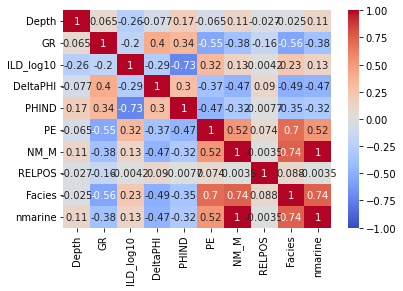

In [17]:
sns.heatmap(cor,cmap='coolwarm',vmin=-1,vmax=1,annot=True)

corr = df.iloc[:,0:11].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.iloc[:,2:11].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.iloc[:,2:11].columns)
ax.set_yticklabels(df.iloc[:,2:11].columns)
plt.show()

In [18]:
Featurespairplots=df[['GR','ILD_log10','PHIND','DeltaPHI','PE','NM_M','RELPOS','Facies_Label']]

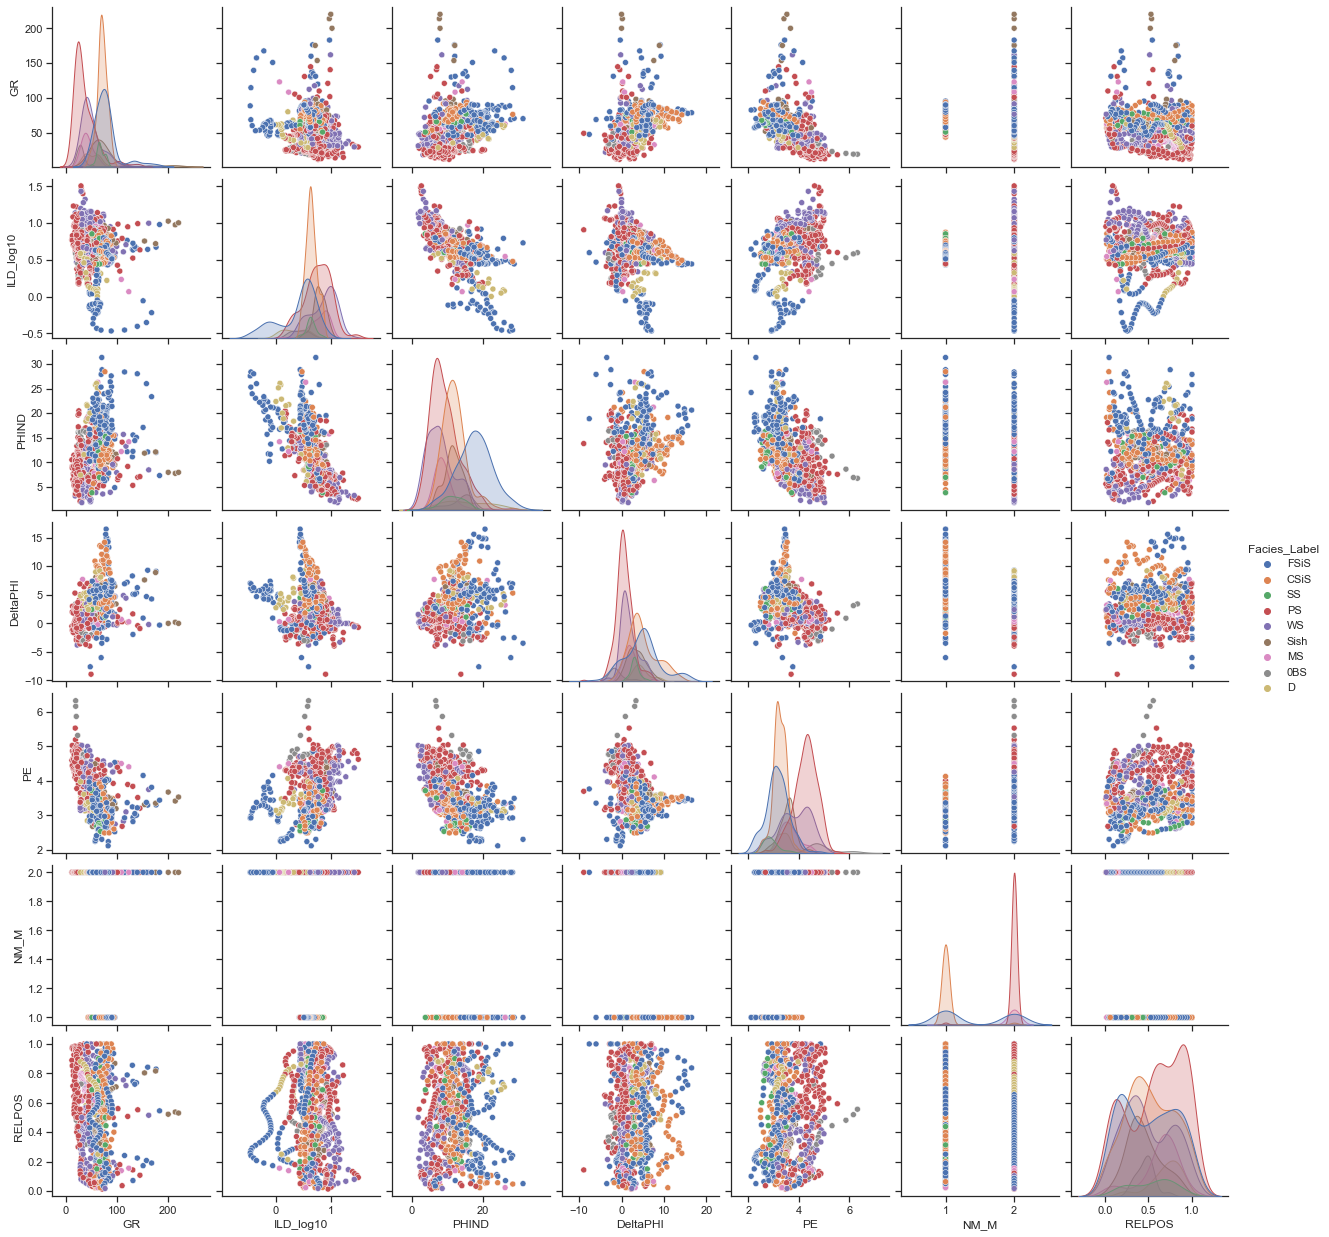

In [19]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(Featurespairplots, hue='Facies_Label')

In [20]:
Features=df[['GR','ILD_log10','PHIND','DeltaPHI','PE','NM_M','RELPOS']]

In [21]:
Features

,GR,ILD_log10,PHIND,DeltaPHI,PE,NM_M,RELPOS
0,66.276,0.630,10.650,3.300,3.591,1,1.000
1,77.252,0.585,11.950,6.500,3.341,1,0.978
2,82.899,0.566,13.600,9.400,3.064,1,0.956
3,80.671,0.593,13.250,9.500,2.977,1,0.933
4,75.971,0.638,12.350,8.700,3.020,1,0.911
...,...,...,...,...,...,...,...
825,86.078,0.554,16.150,5.040,3.161,1,0.639
826,88.855,0.539,16.750,5.560,3.118,1,0.611
827,90.490,0.530,16.780,6.360,3.168,1,0.583
828,90.975,0.522,16.995,7.035,3.154,1,0.556


In [22]:
Features1=df1[['GR','ILD_log10','PHIND','DeltaPHI','PE','nmarine','RELPOS']]
Features1

,GR,ILD_log10,PHIND,DeltaPHI,PE,nmarine,RELPOS
0,66.276,0.630,10.650,3.300,3.591,0,1.000
1,77.252,0.585,11.950,6.500,3.341,0,0.978
2,82.899,0.566,13.600,9.400,3.064,0,0.956
3,80.671,0.593,13.250,9.500,2.977,0,0.933
4,75.971,0.638,12.350,8.700,3.020,0,0.911
...,...,...,...,...,...,...,...
825,86.078,0.554,16.150,5.040,3.161,0,0.639
826,88.855,0.539,16.750,5.560,3.118,0,0.611
827,90.490,0.530,16.780,6.360,3.168,0,0.583
828,90.975,0.522,16.995,7.035,3.154,0,0.556


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Formation     830 non-null    object 
 1   Well Name     830 non-null    object 
 2   Depth         830 non-null    float64
 3   GR            830 non-null    float64
 4   ILD_log10     830 non-null    float64
 5   DeltaPHI      830 non-null    float64
 6   PHIND         830 non-null    float64
 7   PE            830 non-null    float64
 8   NM_M          830 non-null    int64  
 9   RELPOS        830 non-null    float64
 10  Facies        830 non-null    int64  
 11  Facies_Label  830 non-null    object 
 12  nmarine       830 non-null    int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 84.4+ KB


df['Facies_Label']=df['Facies_Label'].astype('category')
df['Well Name']=df['Well Name'].astype('category')
df['Formation']=df['Formation'].astype('category')
df_1=df.loc[(df['Depth']>=2808) & (df['Depth']<2908)]
plt.scatter(df_1['RELPOS'],df_1['Depth'])
df_1=df.loc[(df['Depth']>=2908) & (df['Depth']<3008)]
plt.scatter(df_1['RELPOS'],df_1['Depth'])
df_1=df.loc[(df['Depth']>=3008) & (df['Depth']<3108)]
plt.scatter(df_1['RELPOS'],df_1['Depth'])
plt.scatter(df['Facies'],df['Depth'])
Features=df[['PHIND','DeltaPHI','PE','NM_M','RELPOS','GR','ILD_log10']]
Features.describe()
Features

## Splitting Data 

In [24]:
X=Features1.values
y=df1['Facies'].values

## Scaling and Outlier Detection

In [25]:

from sklearn.ensemble import IsolationForest

In [26]:
from sklearn import preprocessing
model = IsolationForest(contamination = 0.05)
model.fit(Features1)
Features1['anomaly25']=pd.Series(model.predict(Features1))
print(Features1)
Features1['Facies']=df1['Facies']
print((Features1['anomaly25']).value_counts())
Features1.loc[Features1['anomaly25']==1]

         GR  ILD_log10   PHIND  DeltaPHI     PE  nmarine  RELPOS  anomaly25
0    66.276      0.630  10.650     3.300  3.591        0   1.000          1
1    77.252      0.585  11.950     6.500  3.341        0   0.978          1
2    82.899      0.566  13.600     9.400  3.064        0   0.956          1
3    80.671      0.593  13.250     9.500  2.977        0   0.933          1
4    75.971      0.638  12.350     8.700  3.020        0   0.911          1
..      ...        ...     ...       ...    ...      ...     ...        ...
825  86.078      0.554  16.150     5.040  3.161        0   0.639          1
826  88.855      0.539  16.750     5.560  3.118        0   0.611          1
827  90.490      0.530  16.780     6.360  3.168        0   0.583          1
828  90.975      0.522  16.995     7.035  3.154        0   0.556          1
829  90.108      0.513  17.595     7.505  3.125        0   0.528          1

[830 rows x 8 columns]
 1    788
-1     42
Name: anomaly25, dtype: int64


,GR,ILD_log10,PHIND,DeltaPHI,PE,nmarine,RELPOS,anomaly25,Facies
0,66.276,0.630,10.650,3.300,3.591,0,1.000,1,3
1,77.252,0.585,11.950,6.500,3.341,0,0.978,1,3
2,82.899,0.566,13.600,9.400,3.064,0,0.956,1,3
3,80.671,0.593,13.250,9.500,2.977,0,0.933,1,3
4,75.971,0.638,12.350,8.700,3.020,0,0.911,1,3
...,...,...,...,...,...,...,...,...,...
825,86.078,0.554,16.150,5.040,3.161,0,0.639,1,3
826,88.855,0.539,16.750,5.560,3.118,0,0.611,1,3
827,90.490,0.530,16.780,6.360,3.168,0,0.583,1,3
828,90.975,0.522,16.995,7.035,3.154,0,0.556,1,3


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Features1[['PHIND','DeltaPHI','PE','nmarine','RELPOS','GR','ILD_log10']],Features1['Facies'],test_size=0.2,stratify=Features1['Facies'])

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline([('scaler',RobustScaler()),('model',RandomForestClassifier())])

param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split':[2,3,4]
}

grid_rf=GridSearchCV(pipe_rf,param_grid=param_grid,cv=5)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 3, 4],
                         'model__n_estimators': [100, 200, 500]})

In [29]:
y_pred = grid_rf.best_estimator_.predict(X_test)

print(f'Generalisation :{grid_rf.best_estimator_.score(X_test,y_test)}; Memorization: {grid_rf.best_estimator_.score(X_train,y_train)}')


Generalisation :0.8012048192771084; Memorization: 1.0


In [30]:
x = RandomForestClassifier()
param_grid2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split':[2,3,4]
}

grid_rf2=GridSearchCV(x,param_grid=param_grid2,cv=5)
grid_rf2.fit(X_train,y_train)

grid_rf2.score(X_train, y_train)
grid_rf2.score(X_test, y_test)

0.8072289156626506

In [31]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('scaler',RobustScaler()),('model_svc',SVC())])
param_grid2 = {
    'model_svc__C': [0.1,1,10],
    'model_svc__kernel': ['linear', 'poly'],
    'model_svc__degree': [3, 4],
    'model_svc__gamma': ['auto']
}
grid_svc=GridSearchCV(pipe_svc,param_grid=param_grid2,cv=5,verbose = 3)
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.662 total time=   0.0s
[CV 2/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.609 total time=   0.0s
[CV 3/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.556 total time=   0.0s
[CV 4/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.609 total time=   0.0s
[CV 5/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=linear;, score=0.606 total time=   0.0s
[CV 1/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=poly;, score=0.361 total time=   0.0s
[CV 2/5] END model_svc__C=0.1, model_svc__degree=3, model_svc__gamma=auto, model_svc__kernel=poly;, score=0.353 total time=   0.0s
[CV 3/5] END

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model_svc', SVC())]),
             param_grid={'model_svc__C': [0.1, 1, 10],
                         'model_svc__degree': [3, 4],
                         'model_svc__gamma': ['auto'],
                         'model_svc__kernel': ['linear', 'poly']},
             verbose=3)

In [32]:
grid_svc.score(X_train,y_train)
grid_svc.score(X_test,y_test)
print(f'Generalisation :{grid_svc.best_estimator_.score(X_test,y_test)}; Memorization: {grid_svc.best_estimator_.score(X_train,y_train)}')

Generalisation :0.6927710843373494; Memorization: 0.7198795180722891


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pipe_lr = Pipeline([('scaler',RobustScaler()),('pca',PCA()),('model_lr',LogisticRegression())]) 
param_grid3 = {
    'pca__n_components': [2, 3, 4, 5],
    'model_lr__penalty': ['l1','l2'],
    'model_lr__C': [0.1, 1.0, 1.5, 10.0]
}

grid_lr=GridSearchCV(pipe_lr,param_grid=param_grid3,cv=5)
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('pca', PCA()),
                                       ('model_lr', LogisticRegression())]),
             param_grid={'model_lr__C': [0.1, 1.0, 1.5, 10.0],
                         'model_lr__penalty': ['l1', 'l2'],
                         'pca__n_components': [2, 3, 4, 5]})

In [34]:
print(f'Generalisation :{grid_lr.best_estimator_.score(X_test,y_test)}; Memorization: {grid_lr.best_estimator_.score(X_train,y_train)}')

Generalisation :0.572289156626506; Memorization: 0.6054216867469879


In [35]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn_scaled = Pipeline([('scaler',RobustScaler()),('model_knn',KNeighborsClassifier())]) 
param_grid4 = {
    'model_knn__n_neighbors': [3, 5, 7, 9],
    'model_knn__weights': ['uniform', 'distance'],
    'model_knn__p': [1, 2]
}

grid_knn_scaled=GridSearchCV(pipe_knn_scaled,param_grid=param_grid4,cv=5)
grid_knn_scaled.fit(X_train,y_train)
grid_knn_scaled.score(X_test,y_test)

0.8192771084337349

In [36]:
grid_knn_scaled.score(X_train,y_train)

1.0

In [37]:
print(f'Generalisation :{grid_knn_scaled.best_estimator_.score(X_test,y_test)}; Memorization: {grid_knn_scaled.best_estimator_.score(X_train,y_train)}')

Generalisation :0.8192771084337349; Memorization: 1.0


In [38]:
pipe_knn_unscaled = Pipeline([('model_knn',KNeighborsClassifier())]) 
grid_knn_unscaled=GridSearchCV(pipe_knn_unscaled,param_grid=param_grid4,cv=5)
grid_knn_unscaled.fit(X_train,y_train)
grid_knn_unscaled.score(X_test,y_test)

0.6867469879518072

In [39]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['y_pred']=y_pred

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df2['y_test'] = df2['y_test'].replace({1:'SS',2:'CSiS',3:'FSiS',4:'Sish',5:'MS',6:'WS',7:'D',8:'PS',9:'BS'}) 
df2['y_pred'] = df2['y_pred'].replace({1:'SS',2:'CSiS',3:'FSiS',4:'Sish',5:'MS',6:'WS',7:'D',8:'PS',9:'BS'})
df2

,y_test,y_pred
422,MS,MS
329,FSiS,PS
560,FSiS,FSiS
507,Sish,Sish
509,PS,PS
...,...,...
586,FSiS,FSiS
719,CSiS,CSiS
544,Sish,Sish
250,PS,PS


In [42]:
print(confusion_matrix(df2['y_test'],df2['y_pred'],labels=['SS','CSiS','FSiS','Sish','MS','WS','D','PS','BS']))
print(classification_report(df2['y_test'] ,df2['y_pred'],labels=['SS','CSiS','FSiS','Sish','MS','WS','D','PS','BS']))

[[ 1  3  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 1  6 23  0  0  0  0  1  0]
 [ 0  0  1 11  0  0  0  1  0]
 [ 0  1  0  0  8  0  0  1  0]
 [ 0  0  0  1  1 18  2  3  0]
 [ 0  0  0  0  1  0  3  1  0]
 [ 0  2  2  0  0  3  0 35  0]
 [ 0  0  0  0  0  0  0  2  2]]
              precision    recall  f1-score   support

          SS       0.50      0.25      0.33         4
        CSiS       0.73      1.00      0.84        32
        FSiS       0.88      0.74      0.81        31
        Sish       0.92      0.85      0.88        13
          MS       0.80      0.80      0.80        10
          WS       0.86      0.72      0.78        25
           D       0.60      0.60      0.60         5
          PS       0.80      0.83      0.81        42
          BS       1.00      0.50      0.67         4

    accuracy                           0.80       166
   macro avg       0.79      0.70      0.73       166
weighted avg       0.81      0.80      0.80       166

